In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_csv('C:/Users/hp/Anaconda3/Medha ml/comcast_consumeraffairs_complaints.csv')

In [4]:
dt.head()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [5]:
print(dt.shape,dt)

(5659, 4)                                author       posted_on  rating  \
0         Alantae of Chesterfeild, MI   Nov. 22, 2016       1   
1            Vera of Philadelphia, PA   Nov. 19, 2016       1   
2         Sarah of Rancho Cordova, CA   Nov. 17, 2016       1   
3            Dennis of Manchester, NH   Nov. 16, 2016       1   
4                Ryan of Bellevue, WA   Nov. 14, 2016       1   
5                 Terri of Mobile, AL    Nov. 9, 2016       1   
6        Kellie of Salt Lake City, UT    Nov. 9, 2016       1   
7           Kathleen of New Haven, CT    Nov. 6, 2016       2   
8             Shira of Bloomfield, NJ    Nov. 5, 2016       1   
9            Kristy of Alpharetta, GA    Nov. 2, 2016       1   
10                Melissa of Katy, TX    Nov. 1, 2016       1   
11             Lori of Huntsville, AL    Nov. 1, 2016       1   
12          Richard of Lauderhill, FL   Oct. 31, 2016       1   
13            Liz of Eden Prairie, MN   Oct. 31, 2016       1   
14             

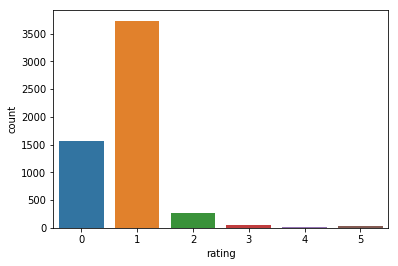

In [6]:
sns.countplot(x='rating',data=dt)

In [7]:
dt.rating.value_counts()

1    3734
0    1560
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

In [8]:
dt_no_rating = dt.loc[dt.rating == 0]
dt = dt.loc[dt.rating != 0]
print(dt_no_rating.shape,dt.shape)

(1560, 4) (4099, 4)


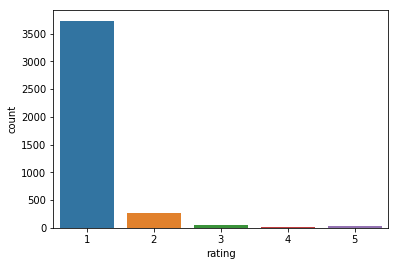

In [9]:
sns.countplot(x='rating',data=dt)

In [10]:
Positive = int(dt['rating'].loc[dt['rating'] >= 3].count())
Negative = int(dt['rating'].loc[dt['rating'] < 3].count())
print("There were {} positive reviews and at least {} negative reviews.".format(str(Positive),str(Negative)))

There were 105 positive reviews and at least 3994 negative reviews.


In [11]:
dt['state'] = dt['author'].str[-2:].apply(lambda x: x.upper())
dt.state.value_counts()

FL    650
CA    345
GA    320
IL    284
PA    221
TN    202
TX    193
MI    189
WA    168
NJ    167
MD    156
VA    146
CO    144
MA    120
IN    104
OR     83
MN     82
CT     50
AL     48
UT     47
SC     38
DE     34
MS     30
NM     30
NH     28
NY     24
DC     22
AZ     20
LA     19
KY     19
AR     17
ER     15
WV     15
MO     11
OH     10
VT      8
WI      8
ME      7
NC      5
KS      3
IA      3
NV      3
BC      2
HI      1
WY      1
ND      1
AK      1
ED      1
PE      1
TA      1
ON      1
ID      1
Name: state, dtype: int64

In [12]:
(dt.loc[dt.rating > 2].state.value_counts() / dt.state.value_counts()).sort_values(ascending=False)

IA    1.000000
ID    1.000000
BC    0.500000
NV    0.333333
WV    0.133333
NH    0.107143
MO    0.090909
ER    0.066667
SC    0.052632
AZ    0.050000
WA    0.047619
CT    0.040000
MN    0.036585
VA    0.034247
NM    0.033333
MI    0.031746
GA    0.031250
IN    0.028846
CO    0.027778
MD    0.025641
MA    0.025000
NJ    0.023952
PA    0.022624
FL    0.021538
UT    0.021277
IL    0.021127
AL    0.020833
CA    0.017391
OR    0.012048
TX    0.005181
TN    0.004950
AK         NaN
AR         NaN
DC         NaN
DE         NaN
ED         NaN
HI         NaN
KS         NaN
KY         NaN
LA         NaN
ME         NaN
MS         NaN
NC         NaN
ND         NaN
NY         NaN
OH         NaN
ON         NaN
PE         NaN
TA         NaN
VT         NaN
WI         NaN
WY         NaN
Name: state, dtype: float64

In [13]:
from wordcloud import WordCloud, STOPWORDS

list_stops = ('comcast','time','customer','even','now','company',
            'day','someone','thing','also','got','way','call','called','one','said','tell','service')

for word in list_stops:
    STOPWORDS.add(word)

In [14]:
low_ratings =dt['text'].dropna().loc[dt['rating']<3].tolist()
low_ratings =''.join(low_ratings).lower()

high_ratings =dt['text'].dropna().loc[dt['rating']>=3].tolist()
high_ratings =''.join(high_ratings).lower()


no_ratings = dt_no_rating['text'].dropna().tolist()
no_ratings =''.join(no_ratings).lower()

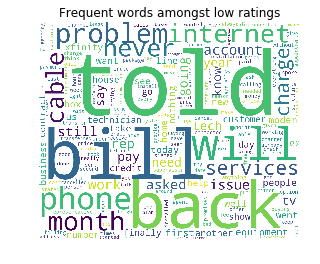

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(low_ratings)
plt.imshow(wordcloud)
plt.title('Frequent words amongst low ratings')
plt.axis('off')
plt.show()

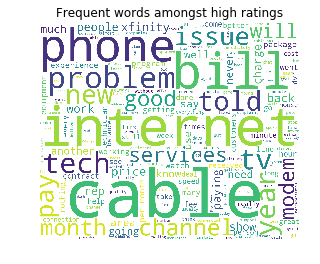

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(high_ratings)
plt.imshow(wordcloud)
plt.title('Frequent words amongst high ratings')
plt.axis('off')
plt.show()

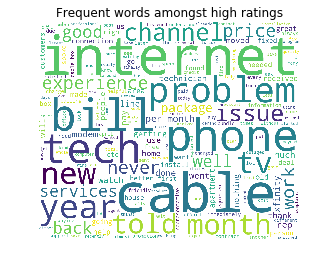

In [17]:
high_ratings =dt['text'].dropna().loc[dt['rating']>=4].tolist()
high_ratings =''.join(high_ratings).lower()

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(high_ratings)
plt.imshow(wordcloud)
plt.title('Frequent words amongst high ratings')
plt.axis('off')
plt.show()

**FCC Complaints**
------------------

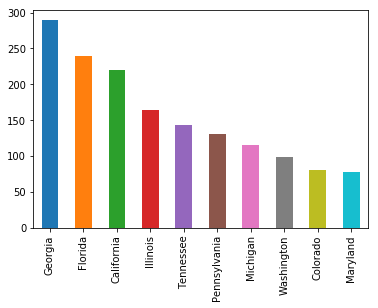

In [18]:
dt_fcc = pd.read_csv('C:/Users/hp/Anaconda3/Medha ml/Comcastfcc.csv')
counts = dt_fcc.State.value_counts()
a = counts.iloc[:10].plot(kind="bar")


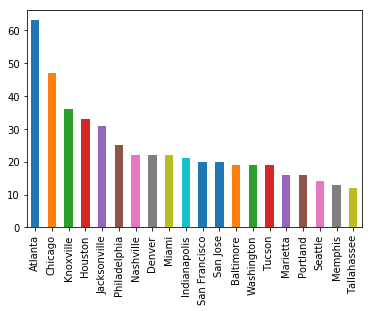

In [19]:
counts = dt_fcc.City.value_counts()
a = counts.iloc[:20].plot(kind="bar")

In [20]:
dt_fcc['Customer Complaint'].value_counts()

Comcast                                                                                                                     83
Comcast Internet                                                                                                            18
Comcast Data Cap                                                                                                            17
comcast                                                                                                                     13
Data Caps                                                                                                                   11
Comcast Data Caps                                                                                                           11
Comcast Billing                                                                                                             11
Unfair Billing Practices                                                                                       

In [21]:
from wordcloud import STOPWORDS
common_complaints = dt_fcc['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('comcast','now','company','day','someone','thing','also','got','way','call','called','one','said','tell')

for word in list_stops:
    STOPWORDS.add(word)
    
  


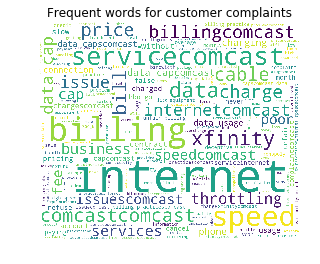

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()